![](images/17_00.png)

In [1]:
data = read.csv("./data/baseball.csv")

In [2]:
head(data)

,Name,Team,Position,Height,Weight,Age,PosCategory
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
2,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
3,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
4,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
5,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder
6,Brian_Roberts,BAL,Second_Baseman,69,176,29.39,Infielder


In [3]:
nrow(data)

[1] 1015

In [4]:
ncol(data)

[1] 7

In [5]:
str(data)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : chr  "Adam_Donachie" "Paul_Bako" "Ramon_Hernandez" "Kevin_Millar" ...
 $ Team       : chr  "BAL" "BAL" "BAL" "BAL" ...
 $ Position   : chr  "Catcher" "Catcher" "Catcher" "First_Baseman" ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: chr  "Catcher" "Catcher" "Catcher" "Infielder" ...


In [7]:
summary(data)

     Name               Team             Position             Height     
 Length:1015        Length:1015        Length:1015        Min.   :67.00  
 Class :character   Class :character   Class :character   1st Qu.:72.00  
 Mode  :character   Mode  :character   Mode  :character   Median :74.00  
                                                          Mean   :73.69  
                                                          3rd Qu.:75.00  
                                                          Max.   :83.00  
     Weight           Age        PosCategory       
 Min.   :150.0   Min.   :20.90   Length:1015       
 1st Qu.:186.0   1st Qu.:25.41   Class :character  
 Median :200.0   Median :27.90   Mode  :character  
 Mean   :201.3   Mean   :28.71                     
 3rd Qu.:215.0   3rd Qu.:31.19                     
 Max.   :290.0   Max.   :48.52                     

In [8]:
baseball = data[c('Height', 'Weight')]
baseball['Height'] = baseball['Height'] * 0.0254
baseball['Weight'] = baseball['Weight'] * 0.453592

In [9]:
head(baseball)

,Height,Weight
,<dbl>,<dbl>
1,1.8796,81.64656
2,1.8796,97.52228
3,1.8288,95.25432
4,1.8288,95.25432
5,1.8542,85.27530
6,1.7526,79.83219


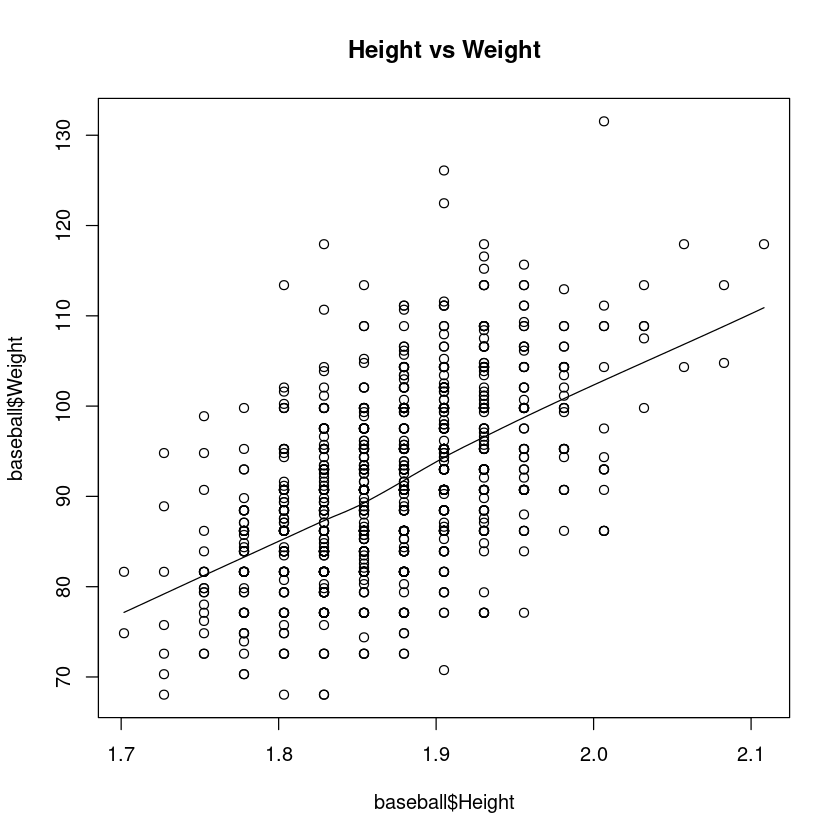

In [10]:
scatter.smooth(x = baseball$Height, y = baseball$Weight,
               main = 'Height vs Weight')

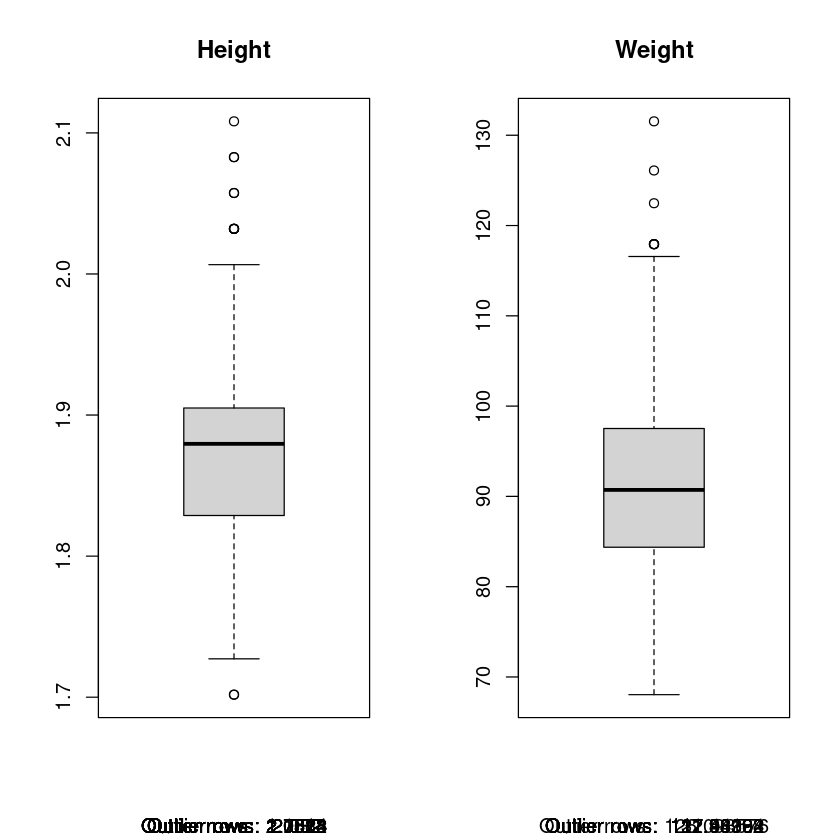

In [11]:
par(mfrow = c(1, 2))
boxplot(baseball$Height, main = 'Height',
        sub = paste('Outlier rows: ', boxplot.stats(baseball$Height)$out))
boxplot(baseball$Weight, main = 'Weight',
        sub = paste('Outlier rows: ', boxplot.stats(baseball$Weight)$out))

In [12]:
cor(baseball$Height, baseball$Weight)

[1] 0.5315393

In [13]:
wt_outliers = boxplot.stats(baseball$Weight)$out

wt_outliers

[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339

In [14]:
ht_outliers = boxplot.stats(baseball$Height)$out

ht_outliers

[1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018

In [17]:
baseball = baseball[!(baseball$Height %in% ht_outliers),]
baseball = baseball[!(baseball$Weight %in% wt_outliers),]

head(baseball)

,Height,Weight
,<dbl>,<dbl>
1,1.8796,81.64656
2,1.8796,97.52228
3,1.8288,95.25432
4,1.8288,95.25432
5,1.8542,85.27530
6,1.7526,79.83219


In [19]:
set.seed(42)

trainingRowIndex = sample(1:nrow(baseball), 0.7*nrow(baseball))
trainingData = baseball[trainingRowIndex,]
testData = baseball[-trainingRowIndex,]

In [20]:
lmMod = lm(Weight ~ Height, data = trainingData)

In [21]:
mse = mean(lmMod$residuals^2)

mse

[1] 62.1666

In [23]:
iPred = predict(lmMod, testData)

In [24]:
mse_test = mean((testData$Weight - iPred)^2)

mse_test

[1] 57.18304

In [25]:
summary(lmMod)


Call:
lm(formula = Weight ~ Height, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.8230  -5.6531  -0.1704   5.1062  27.6049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -52.482     10.113   -5.19 2.76e-07 ***
Height        76.675      5.408   14.18  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.896 on 696 degrees of freedom
Multiple R-squared:  0.2241,	Adjusted R-squared:  0.223 
F-statistic:   201 on 1 and 696 DF,  p-value: < 2.2e-16


In [26]:
beta_height = coef(lmMod)['Height']

beta_height

Height 
76.67488

In [27]:
intercept = coef(lmMod)['(Intercept)']

intercept

(Intercept) 
  -52.48233

In [28]:
# cách 1
x = c(1.775, 1.825, 1.925)
y = intercept + beta_height * x

y

[1] 83.61558 87.44932 95.11681

In [30]:
# cách 2
y = predict(lmMod, data.frame(Height = x))

y

1        2        3 
83.61558 87.44932 95.11681

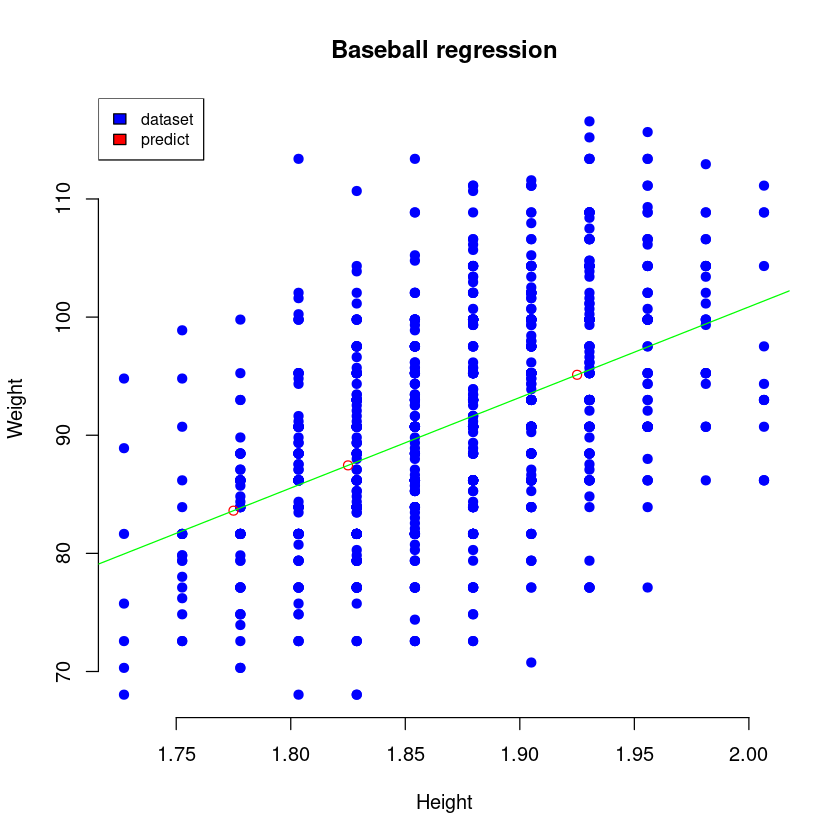

In [31]:
plot(baseball$Height, baseball$Weight, main = 'Baseball regression',
     xlab = 'Height', ylab = 'Weight', pch = 19, frame = F, col = 'blue')
lines(x, y, col = 'red', type = 'p')
abline(lmMod, baseball, col = 'green')
legend('topleft', c('dataset', 'predict'), cex = 0.8, fill = c('blue', 'red'))